<a href="https://colab.research.google.com/github/sarikasea/Python/blob/main/Housing_Prices_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
# import piplite
# await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

!pip install seaborn

In [6]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [10]:
import urllib.request

url = filepath  # Replace with the URL of the file you want to download
filename = 'housing.csv'  # Replace with the desired filename

try:
    urllib.request.urlretrieve(url, filename)
    print(f"File downloaded successfully to {filename}")
except Exception as e:
    print(f"Error downloading file: {e}")

File downloaded successfully to housing.csv


In [12]:
df = pd.read_csv(filename)

In [13]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [14]:
display(df.dtypes)

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [15]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [16]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
display(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [18]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [20]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [21]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [22]:
floor_counts = df['floors'].value_counts().to_frame()
display(floor_counts)

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.


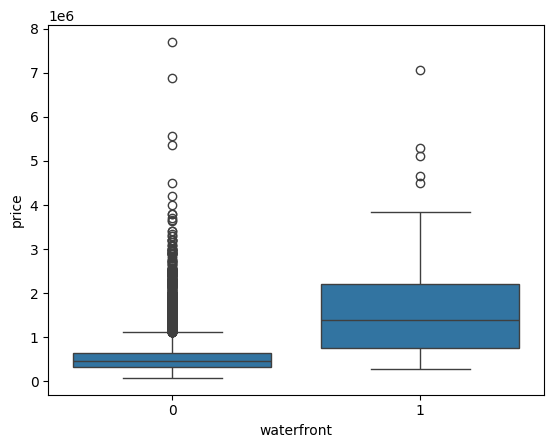

In [23]:
sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

The boxplot shows that houses with a waterfront view (waterfront = 1) tend to have a higher median price and more outliers compared to houses without a waterfront view (waterfront = 0).

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.


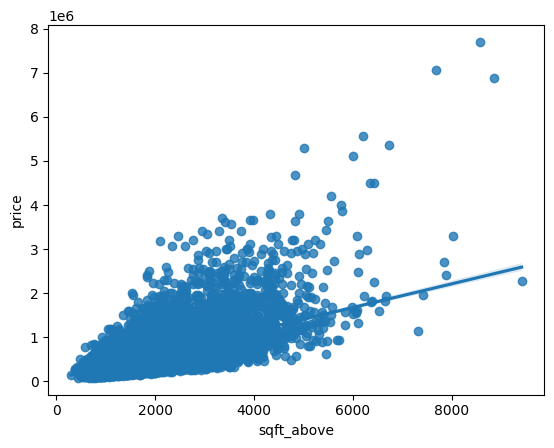

In [24]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.show()

The regression plot in the previous cell shows a positive correlation between `sqft_above` and `price`. This means that as the square footage above ground level increases, the price of the house tends to increase as well.

# Module 4: Model Development


### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [26]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.00046769430149007363


In [25]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4928532179037931


R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variable (sqft_living). In simpler terms, it tells you how well the linear regression model fits the data.

The R-squared value of approximately 0.49 in the previous cell indicates that about 49% of the variation in house prices can be explained by the square footage of the living area. This suggests that 'sqft_living' is a moderately good predictor of price, but other factors also significantly influence the price of a house.

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [27]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [28]:
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.65769516660375


The R-squared value is approximately 0.658, which indicates that about 65.8% of the variance in price can be explained by these features.

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [29]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

This line of code creates a Python list named Input. Each element in the list is a tuple. These tuples are used to define the steps of a machine learning pipeline in scikit-learn.

('scale', StandardScaler()): This is the first step. It names the step 'scale' and uses the StandardScaler() constructor. This step is typically used to standardize features by removing the mean and scaling to unit variance.
('polynomial', PolynomialFeatures(include_bias=False)): This is the second step. It names the step 'polynomial' and uses the PolynomialFeatures(include_bias=False) constructor. This step generates polynomial and interaction features. include_bias=False means it will not include the bias term (a column of ones).
('model', LinearRegression()): This is the third and final step. It names the step 'model' and uses the LinearRegression() constructor. This is the actual machine learning model that will be trained.
When you create a scikit-learn Pipeline object with this list, the steps will be applied sequentially to the data: first scaling, then polynomial feature transformation, and finally fitting the linear regression mode

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [31]:
X = df[features]
Y = df['price']
pipe = Pipeline(Input)
pipe.fit(X,Y)
print('The R-square is: ', pipe.score(X,Y))

The R-square is:  0.7513408515988734


Yes, the previous cell (`rx7ceA6fibgm`) used the `features` list. The line `pipe.fit(X,Y)` in that cell utilizes the variable `X`, which was defined in cell `ysAkMq7BiVY2` as `X = df[features]`. This means the data used to fit the pipeline was filtered to include only the columns listed in the `features` list.

# Module 5: Model Evaluation and Refinement


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [33]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
print('The R-square is: ', ridge_model.score(x_test, y_test))

The R-square is:  0.6478759163939113


A **Ridge regression** model is a type of linear regression that includes a regularization term. Regularization is a technique used to prevent overfitting in machine learning models.

In Ridge regression, a penalty is added to the cost function that the model tries to minimize during training. This penalty is proportional to the square of the magnitude of the coefficients. By adding this penalty, the model is discouraged from assigning very large weights to any single feature, which can help to make the model more robust and generalize better to unseen data.

The strength of the regularization is controlled by a parameter called **alpha (α)**. A larger alpha increases the penalty, leading to smaller coefficients. A smaller alpha reduces the penalty, making the model closer to ordinary linear regression.

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [35]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

In [36]:
from sklearn.linear_model import Ridge

ridge_model_pr = Ridge(alpha=0.1)
ridge_model_pr.fit(x_train_pr, y_train)
print('The R-square is: ', ridge_model_pr.score(x_test_pr, y_test))

The R-square is:  0.7002744273539743


This assignment question asks you to perform the following steps:

1.  **Perform a second order polynomial transform on both the training data and testing data:** This means you need to create new features from your existing features by raising them to the power of two and also creating interaction terms between features. For example, if you have features A and B, a second-order polynomial transform would create new features like A², B², and A*B. This is done separately for your training dataset (`x_train`) and your testing dataset (`x_test`). The code in cell `BbKVTHlzin8C` does this using `PolynomialFeatures(degree=2)`. `pr.fit_transform(x_train)` learns the polynomial features from the training data and applies the transformation, while `pr.transform(x_test)` applies the same learned transformation to the test data.

2.  **Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1:** After transforming the data, you need to train a Ridge regression model. Ridge regression is a type of linear regression that includes a penalty term to prevent overfitting. The regularization parameter, `alpha`, controls the strength of this penalty. A value of 0.1 is specified here. You will fit this model using the *transformed* training data (`x_train_pr`) and the corresponding training target variable (`y_train`). The code in cell `38xQo5P1ioHV` does this: `ridge_model_pr = Ridge(alpha=0.1)` creates the model object, and `ridge_model_pr.fit(x_train_pr, y_train)` trains the model.

3.  **Calculate the R^2 utilising the test data provided:** Finally, you need to evaluate how well your trained Ridge regression model performs on unseen data. This is done by calculating the R-squared value using the *transformed* test data (`x_test_pr`) and the corresponding test target variable (`y_test`). The R-squared value indicates the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (the transformed features). The code in cell `38xQo5P1ioHV` calculates this using `ridge_model_pr.score(x_test_pr, y_test)`.